Marisol Martinez
mm6149

# MNIST Sign Language

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras import layers
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [53]:
class SignLanguage:
    def __init__(self):
        self.model = None
        self.data = {
            "train": None,
            "test" : None
        }

        self.create_model()

    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """

        # TODO: Create a Sequential model
        model = Sequential([
        Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(25, activation='softmax')
        ]) #Sequential()

        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

        self.model = model

    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)

        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)

        images = images.reshape(-1, 28, 28, 1) / 225.0

        labels = to_categorical(labels)

        x_train, x_test, y_train, y_test = train_test_split(
        images, labels, test_size=0.2, random_state=42)

        self.data["train"] = (x_train, y_train)
        self.data["test"] = (x_test, y_test)

    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.

        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        x_train, y_train = self.data["train"]
        x_test, y_test = self.data["test"]


        history = self.model.fit(
        x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size,
        epochs=epochs, verbose=verbose) #None
        return history

    def predict(self, data):
        """
        Use the trained model to predict labels for test data.

        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help

        data = data.reshape(-1, 28, 28, 1)

        data = np.array(data) / 255.0  # Normalize test data
        predictions = self.model.predict(data)
        return np.argmax(predictions, axis=1)

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
if __name__=="__main__":
    train = pd.read_csv('/content/drive/MyDrive/train.csv')
    test  = pd.read_csv('/content/drive/MyDrive/test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [56]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


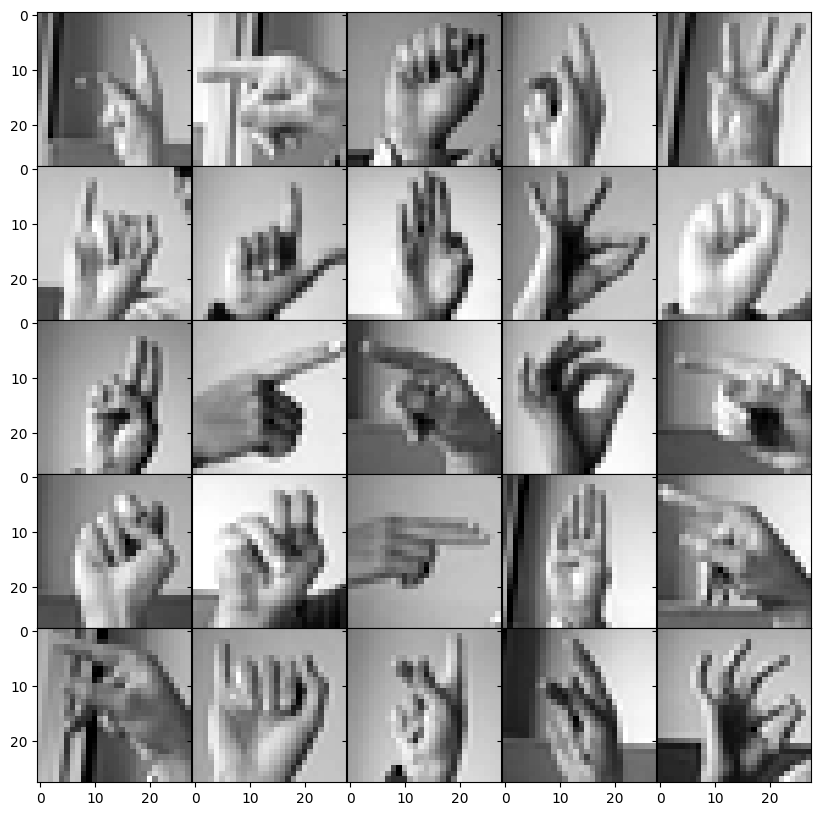

In [57]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1550 - loss: 2.8920 - val_accuracy: 0.7001 - val_loss: 1.4079
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5524 - loss: 1.4602 - val_accuracy: 0.8696 - val_loss: 0.6397
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7197 - loss: 0.9034 - val_accuracy: 0.9246 - val_loss: 0.3622
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.6439 - val_accuracy: 0.9659 - val_loss: 0.2339
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.4802 - val_accuracy: 0.9851 - val_loss: 0.1388
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8810 - loss: 0.3825 - val_accuracy: 0.9962 - val_loss: 0.0768
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9051 - loss: 0.3066 - val_accuracy: 0.9989 - val_loss: 0.0592
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9240 - loss: 0.2550 - val_accuracy: 0

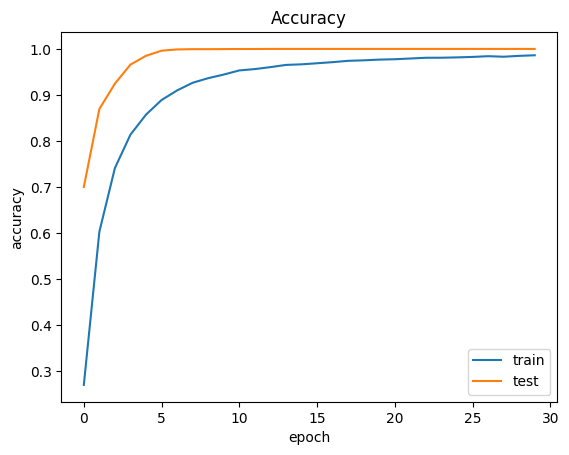

In [58]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [59]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.9107640825432236
